# 08. 딥 러닝(Deep Learning) 개요

## 10) 다층 퍼셉트론(MultiLayer Perceptron, MLP)으로 텍스트 분류하기

### 1. 다층 퍼셉트론(MultiLayer Perceptron, MLP)

앞서 단층 퍼셉트론의 형태에서 은닉층이 1개 이상 추가된 신경망을 다층 퍼셉트론(MLP)이라고 한다고 배웠습니다. 

다층 퍼셉트론은 피드 포워드 신경망(Feed Forward Neural Network, FFNN)의 가장 기본적인 형태입니다. 

피드 포워드 신경망은 입력층에서 출력층으로 오직 한 방향으로만 연산 방향이 정해져 있는 신경망을 말합니다.

### 2. 케라스의 texts_to_matrix() 이해하기

texts_to_matrix()란 이름에서 알 수 있지만, 이 도구는 입력된 텍스트 데이터로부터 행렬(matrix)를 만드는 도구입니다.

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

texts = ['먹고 싶은 사과', '먹고 싶은 바나나', 
         '길고 노란 바나나 바나나', '저는 과일이 좋아요']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
print(tokenizer.word_index)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


**'count' 모드**: 문서 단어 행렬(Document-Term Matrix, DTM)을 생성합니다.

In [2]:
print(tokenizer.texts_to_matrix(texts, mode='count')) 
# texts_to_matrix의 입력으로 texts를 넣고, 모드는 'count'
#  DTM은 bag of words를 기반으로 하므로 단어 순서 정보는 보존되지 않습니다.

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


**'binary' 모드**: 단어의 존재 유무로만 행렬을 표현합니다.

In [4]:
print(tokenizer.texts_to_matrix(texts, mode='binary'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


**'tfidf' 모드**: 말 그대로 TF-IDF 행렬을 만듭니다.

In [5]:
print(tokenizer.texts_to_matrix(texts, mode='tfidf').round(2))
# 둘째 자리까지 반올림하여 출력

[[0.   0.   0.85 0.85 1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   1.43 0.   0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]


**'freq' 모드**: 각 문서에서의 각 단어의 등장 횟수를 분자로, 각 문서의 크기(각 문서에서 등장한 모든 단어의 개수의 총 합)를 분모로 하는 표현 방법입니다.

In [7]:
print(tokenizer.texts_to_matrix(texts, mode='freq').round(2))
# 둘째 자리까지 반올림하여 출력

[[0.   0.   0.33 0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]


### 3. 20개 뉴스 그룹(Twenty Newsgroups) 데이터에 대한 이해

In [8]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

newsdata = fetch_20newsgroups(subset='train') 
# 'train'을 기재하면 훈련 데이터만 리턴한다.

In [9]:
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [10]:
print('훈련용 샘플의 개수 : {}'.format(len(newsdata.data)))

훈련용 샘플의 개수 : 11314


In [11]:
print('총 주제의 개수 : {}'.format(len(newsdata.target_names)))
print(newsdata.target_names)

총 주제의 개수 : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [13]:
print('첫번째 샘플의 레이블 : {}'.format(newsdata.target[0]))
print('7번 레이블이 의미하는 주제 : {}'.format(newsdata.target_names[7]))

첫번째 샘플의 레이블 : 7
7번 레이블이 의미하는 주제 : rec.autos


In [14]:
print(newsdata.data[0]) # 첫번째 샘플 출력

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







훈련에 사용될 메일 본문인 data와 레이블인 target을 데이터프레임으로 만들어서 데이터에 대한 통계적인 정보들을 알아보겠습니다.

In [15]:
data = pd.DataFrame(newsdata.data, columns=['email'])
data['target'] = pd.Series(newsdata.target)
data[:5]

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 132.7+ KB


In [18]:
data.isnull().values.any()
# 혹시 Null 값을 가진 샘플이 있는지 isnull().values.any()로도 확인 가능합니다.

False

nunique()를 통해 샘플 중 중복을 제거한 개수를 확인할 수 있습니다.

In [19]:
print('중복을 제외한 샘플의 수 : {}'.format(data['email'].nunique()))
print('중복을 제외한 주제의 수 : {}'.format(data['target'].nunique()))

중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20


레이블 값의 분포를 시각화해보겠습니다.

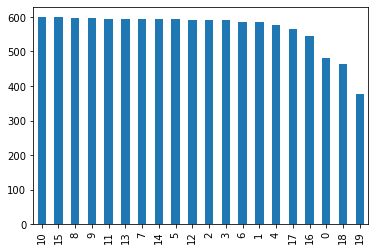

In [20]:
data['target'].value_counts().plot(kind='bar')

각 레이블이 몇 개 있는지 구체적인 수치로 확인해보겠습니다.

In [21]:
print(data.groupby('target').size().reset_index(name='count'))

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


데이터프레임으로부터 다시 메일 본문과 레이블을 분리하고, 테스트 데이터 또한 불러오겠습니다. 

subset에 'test'를 기재하면 테스트 데이터를 불러옵니다. 

In [22]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)
train_email = data['email']
train_label = data['target']
test_email = newsdata_test.data
test_label = newsdata_test.target

In [23]:
max_words = 10000 # 사용할 최대 단어 개수
num_classes = 20

전처리 함수

In [24]:
def prepare_data(train_data, test_data, mode):
    tokenizer = Tokenizer(num_words=max_words) # max_words 개수만큼의 단어만 사용한다.
    tokenizer.fit_on_texts(train_data)
    X_train = tokenizer.texts_to_matrix(train_data, mode=mode) # 샘플 수 × max_words 크기의 행렬 생성
    X_test = tokenizer.texts_to_matrix(test_data, mode=mode) # 샘플 수 × max_words 크기의 행렬 생성
    return X_train, X_test, tokenizer.index_word

In [25]:
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary') # binary 모드로 변환
y_train = to_categorical(train_label, num_classes) # 원-핫 인코딩
y_test = to_categorical(test_label, num_classes) # 원-핫 인코딩

In [26]:
print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)


In [27]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))
# 불용어에 해당되는 단어 'the'가 빈도수 상위 1번 단어인 것을 확인할 수 있습니다.

빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic


### 4. 다층 퍼셉트론(Multilayer Perceptron, MLP)을 사용하여 텍스트 분류하기

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(256, input_shape=(max_words,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    return score[1]

앞서 배운 texts_to_matrix()의 4개의 모드에 대해서 전부 모델의 결과를 확인해보겠습니다.

In [29]:
modes = ['binary', 'count', 'tfidf', 'freq'] # 4개의 모드를 리스트에 저장.

for mode in modes: # 4개의 모드에 대해서 각각 아래의 작업을 반복한다.
    X_train, X_test, _ = prepare_data(train_email, test_email, mode) # 모드에 따라서 데이터를 전처리
    score = fit_and_evaluate(X_train, y_train, X_test, y_test) # 모델을 훈련하고 평가.
    print(mode+' 모드의 테스트 정확도:', score)

Epoch 1/5
80/80 [==============================] - 1s 7ms/step - loss: 2.2907 - accuracy: 0.3320 - val_loss: 0.9852 - val_accuracy: 0.8163
Epoch 2/5
80/80 [==============================] - 0s 5ms/step - loss: 0.8839 - accuracy: 0.7594 - val_loss: 0.4698 - val_accuracy: 0.8754
Epoch 3/5
80/80 [==============================] - 0s 6ms/step - loss: 0.4362 - accuracy: 0.8843 - val_loss: 0.3573 - val_accuracy: 0.8993
Epoch 4/5
80/80 [==============================] - 0s 6ms/step - loss: 0.2645 - accuracy: 0.9329 - val_loss: 0.3271 - val_accuracy: 0.9099
Epoch 5/5
80/80 [==============================] - 0s 6ms/step - loss: 0.1735 - accuracy: 0.9558 - val_loss: 0.3086 - val_accuracy: 0.9134
binary 모드의 테스트 정확도: 0.8260754346847534
Epoch 1/5
80/80 [==============================] - 1s 7ms/step - loss: 2.7759 - accuracy: 0.2375 - val_loss: 1.6157 - val_accuracy: 0.7270
Epoch 2/5
80/80 [==============================] - 0s 6ms/step - loss: 1.4373 - accuracy: 0.6187 - val_loss: 0.7095 - val_accur